# Simulation Log EDA

## Depdendencies

In [1]:
import pandas as pd
import numpy as np 
from pathlib import Path
import matplotlib.pyplot as plt

## Functions


## Globals

In [2]:
PATH = Path('../logs/simulation_2023_4_4_21_43_57_READABLE.txt')

-- Timestamp: 310.24

"location": [-214.9896,-217.667]
"temperature": 84.59534
"oxygen_saturation": 0.96, "heart_rate": 200

## Parse the file

In [3]:
# Create empty lists to store each entry
timestamps = []
locations = []
temperatures = []
oxygen_saturations = []
heart_rates = []

# Read in the file
with open(PATH, "r") as file:
    for i, line in enumerate(file):
        #print(f"Parsing line {i}...")
        # Check if line starts with "Timestamp"
        if line.startswith("-- Timestamp"):
            # Extract the timestamp value
            timestamp = float(line.split(":")[1].strip())
            timestamps.append(timestamp)
        # Check if line starts with "location"
        elif line.startswith('"location"'):
            # Extract the location values
            location = line.split(":")[1].strip().replace("[", "").replace("]", "").split(",")
            location = [float(l.strip()) for l in location]
            locations.append(location)
        # Check if line starts with "temperature"
        elif line.startswith('"temperature"'):
            # Extract the temperature value
            temperature = float(line.split(":")[1].strip())
            temperatures.append(temperature)
        # Check if line starts with "oxygen_saturation"
        elif line.startswith('"oxygen_saturation"'):
            # Extract the oxygen saturation value
            oxygen_saturation = float(line.split(":")[1].strip().split(",")[0])
            oxygen_saturations.append(oxygen_saturation)
            # Extract the heart rate value
            heart_rate = float(line.split(":")[2].strip())
            heart_rates.append(heart_rate)

# Create a dictionary with the lists
data_dict = {"Timestamp": timestamps,
             "Location": locations,
             "Temperature": temperatures,
             "Oxygen Saturation": oxygen_saturations,
             "Heart Rate": heart_rates}

# Convert the dictionary to a Pandas dataframe
df = pd.DataFrame(data_dict)


In [95]:
df.head()

,Timestamp,Location,Temperature,Oxygen Saturation,Heart Rate
0,234.16,"[-214.9896, -217.667]",84.54807,0.96,200.0
1,235.18,"[-214.9896, -217.667]",84.54870,0.96,200.0
2,236.19,"[-214.9896, -217.667]",84.54934,0.96,200.0
3,237.21,"[-214.9896, -217.667]",84.54996,0.96,200.0
4,238.23,"[-214.9896, -217.667]",84.55060,0.96,200.0


## Questions to answer

1. Is the Zebra population healthy? Make a thoughtful case one way or another.
1. Do the Zebras have enough room to move around in?
1. Do you see any signs of poachers? If so, where are they?
1. Plot a CDF of the movement speed of Zebras. What do you observe?
1. Do Zebras make friends? Do you see pairs that tend to stay together? 
1. What locations do Zebras tend to congregate at? Why do they tend to go there?
1. Are there any locations Zebras tend to avoid? 


### Question 4: Plot a CDF

In [4]:
import seaborn as sns
import statsmodels.api as sm

In [5]:
df['Location_X'] = df.Location.apply(lambda x: x[0])
df['Location_Y'] = df.Location.apply(lambda x: x[1])

Not sure if this makes sense - are these the locations of the zebras?

<Axes: xlabel='Location_X', ylabel='Location_Y'>

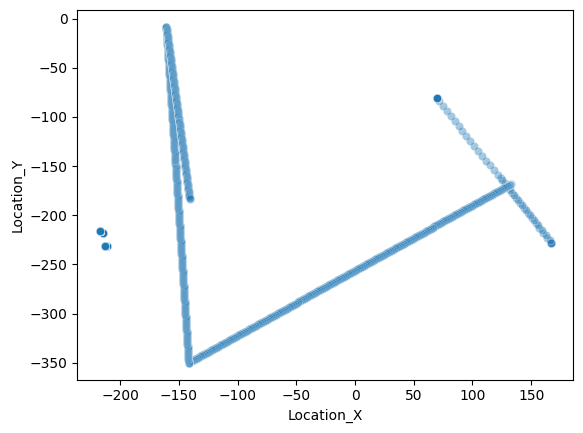

In [6]:
sns.scatterplot(x='Location_X', y='Location_Y', data=df, alpha=0.4)

A nicer way to look at it with a kernel density function. Somewhat reminiscent of the heatmaps in soccer and other team games. 

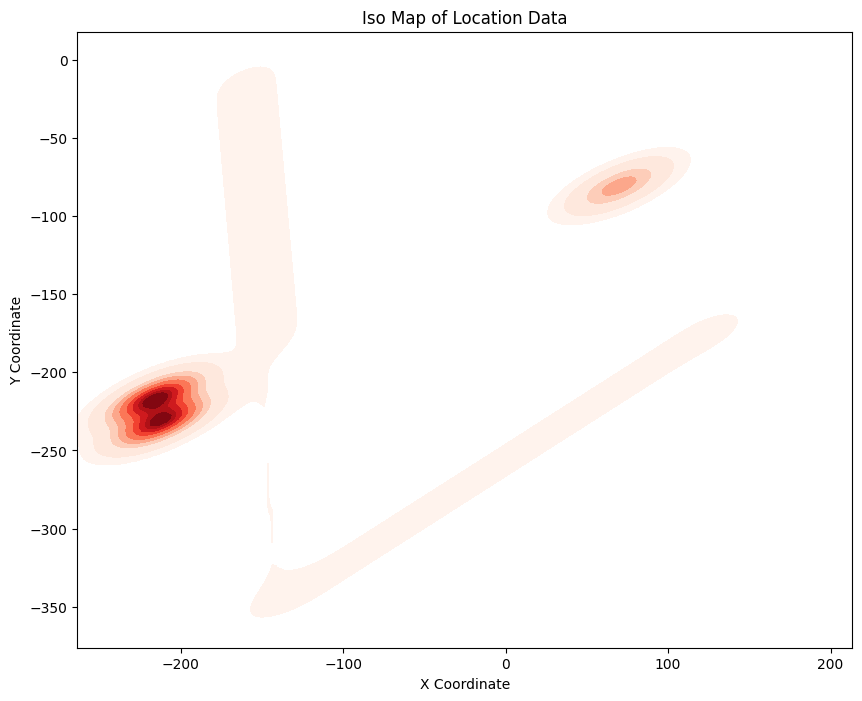

In [7]:

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(10, 8))

# Apply the kernel density estimate to the location data and create a heatmap
sns.kdeplot(
    x=df['Location_X'],
    y=df['Location_Y'],
    cmap='Reds',
    fill=True, 
    bw_method =0.15, 
    ax=ax
    )

ax.set_xlabel('X Coordinate')
ax.set_ylabel('Y Coordinate')
ax.set_title('Iso Map of Location Data')

plt.show()

The text asked to plot some CDFs, though I find them hard to interpret at this stage. Maybe with more data or better understanding of what the animals do. 

<Axes: xlabel='Temperature'>

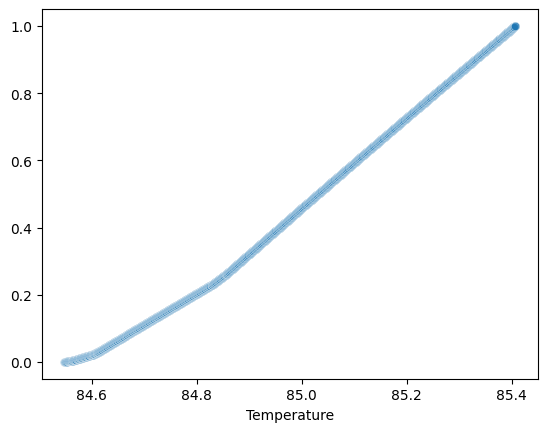

In [8]:
# Calculate the ECDF of the "Temperature" column
ecdf = sm.distributions.ECDF(df["Temperature"])

# Create a range of values to plot the CDF
x = np.linspace(min(df["Temperature"]), max(df["Temperature"]), num=100)

# Calculate the CDF values for the range of values
y = ecdf(x)

# Plot the CDF
sns.scatterplot(x=df["Temperature"], y=ecdf(df["Temperature"]), alpha=0.4)

In [121]:
df

,Timestamp,Location,Temperature,Oxygen Saturation,Heart Rate,Location_X,Location_Y
0,234.16,"[-214.9896, -217.667]",84.54807,0.96,200.0,-214.9896,-217.6670
1,235.18,"[-214.9896, -217.667]",84.54870,0.96,200.0,-214.9896,-217.6670
2,236.19,"[-214.9896, -217.667]",84.54934,0.96,200.0,-214.9896,-217.6670
3,237.21,"[-214.9896, -217.667]",84.54996,0.96,200.0,-214.9896,-217.6670
4,238.23,"[-214.9896, -217.667]",84.55060,0.96,200.0,-214.9896,-217.6670
...,...,...,...,...,...,...,...
6833,1577.70,"[-141.3235, -179.1558]",85.40416,0.98,45.0,-141.3235,-179.1558
6834,1578.70,"[-141.2101, -180.1501]",85.40482,0.98,45.0,-141.2101,-180.1501
6835,1579.70,"[-141.0967, -181.1438]",85.40547,0.98,45.0,-141.0967,-181.1438
6836,1580.72,"[-140.9815, -182.1539]",85.40614,0.98,45.0,-140.9815,-182.1539


In [10]:
df.describe()

,Timestamp,Temperature,Oxygen Saturation,Heart Rate,Location_X,Location_Y
count,6838.000000,6838.000000,6838.000000,6838.000000,6838.000000,6838.000000
mean,986.801825,85.023010,0.966120,150.214244,-162.288819,-202.129090
std,360.186415,0.229800,0.009239,65.314253,103.531399,58.220275
min,234.160000,84.548070,0.960000,30.000000,-217.259500,-350.006300
25%,712.585000,84.847160,0.960000,60.000000,-214.998600,-231.337800
50%,1004.270000,85.032070,0.960000,200.000000,-213.190600,-217.664000
75%,1293.475000,85.218225,0.980000,200.000000,-160.180400,-215.991200
max,1581.740000,85.406810,0.990000,200.000000,166.815600,-8.268056


<Axes: xlabel='Timestamp', ylabel='Temperature'>

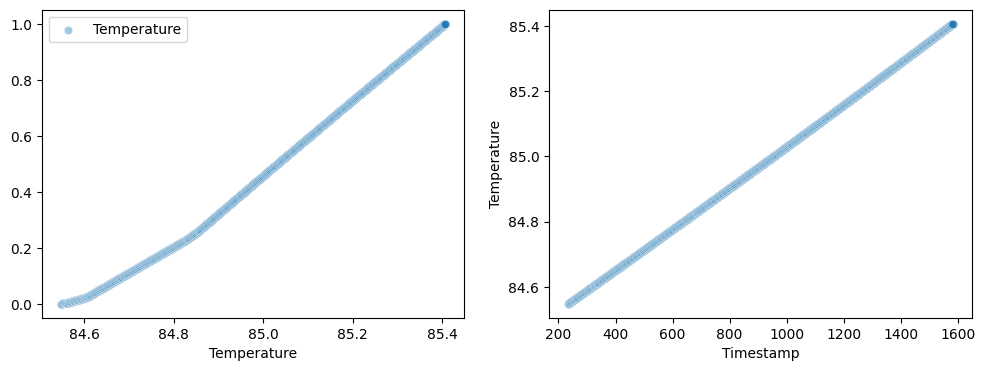

In [11]:
# Calculate the ECDF of the "Temperature" column
col = 'Temperature'
ecdf = sm.distributions.ECDF(df[col])

# Plot the CDF
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
#axes[0].plot(ecdf.x, ecdf.y)
sns.scatterplot(x=df[col], y=ecdf(df[col]), alpha=0.4, ax=axes[0], label=col)
sns.scatterplot(x=df['Timestamp'], y=df['Temperature'], alpha=0.4, ax=axes[1])

<Axes: xlabel='Timestamp', ylabel='Oxygen Saturation'>

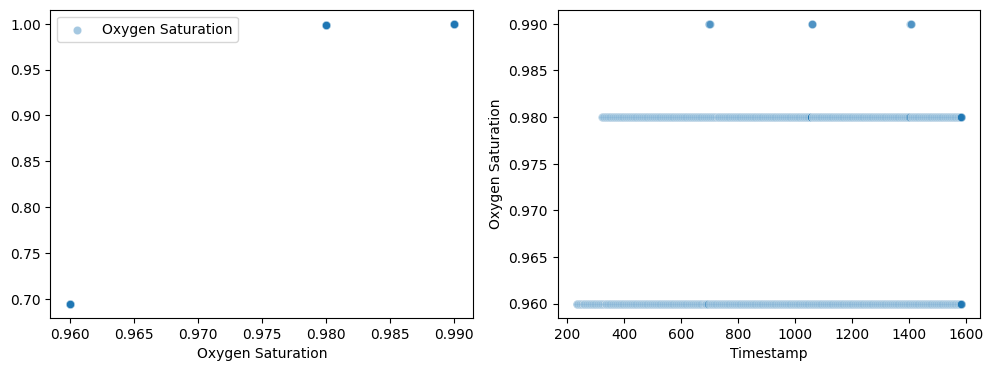

In [12]:
col = 'Oxygen Saturation'
ecdf = sm.distributions.ECDF(df[col])

# Plot the CDF
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
#axes[0].plot(ecdf.x, ecdf.y)
sns.scatterplot(x=df[col], y=ecdf(df[col]), alpha=0.4, ax=axes[0], label=col)
sns.scatterplot(x=df['Timestamp'], y=df[col], alpha=0.4, ax=axes[1])

In [13]:
df['Oxygen Saturation'].unique()

array([0.96, 0.98, 0.99])

Only three oxygen values?

<Axes: xlabel='Oxygen Saturation', ylabel='Heart Rate'>

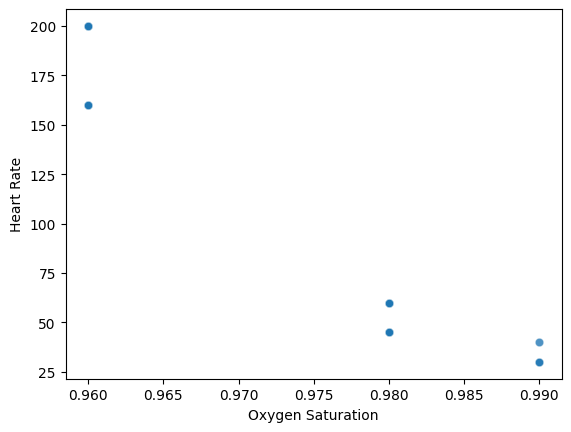

In [14]:
sns.scatterplot(x=df['Oxygen Saturation'], y=df['Heart Rate'], alpha=0.4)

Why is oxygen saturation declining with heart rate? Does it mean running fast makes your heart beat faster, but the oxygen is consumed at a yet higher rate?

Oxygen debt?

<Axes: xlabel='Timestamp', ylabel='Oxygen Saturation'>

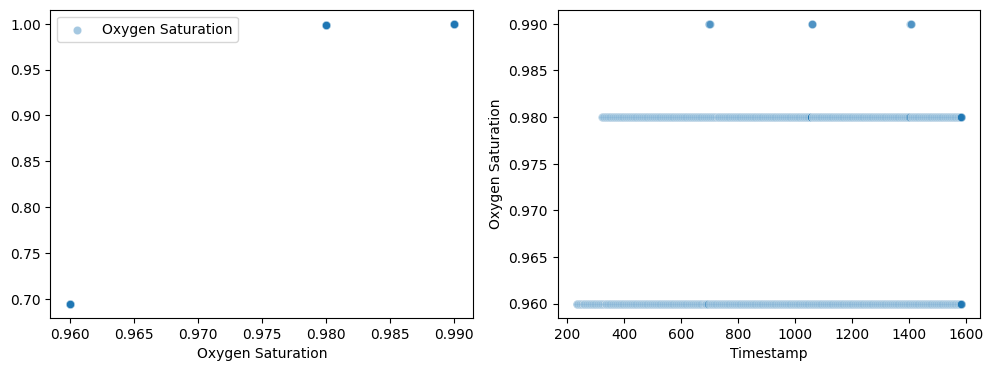

In [ ]:
col = 'Oxygen Saturation'
ecdf = sm.distributions.ECDF(df[col])

# Plot the CDF
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
#axes[0].plot(ecdf.x, ecdf.y)
sns.scatterplot(x=df[col], y=ecdf(df[col]), alpha=0.4, ax=axes[0], label=col)
sns.scatterplot(x=df['Timestamp'], y=df[col], alpha=0.4, ax=axes[1])

#### Plot of velocity CDF

On closer inspection the text in question 4 asks for a plot of CDF of velocity 

First compute velocity

In [35]:
def distance(X):
    if isinstance(X, pd.Series):
        X = np.array(list(X))
    return np.sqrt(np.sum(np.power(np.diff(X, axis=0), 2), axis=1))

In [37]:
def velocity(X, t):
    X = distance(X)
    t = np.diff(t)
    return X/t

In [45]:
df['velocity'] = np.array([0, *velocity(df.Location, df.Timestamp)])

How does velocity change over time?

<Axes: xlabel='Timestamp', ylabel='velocity'>

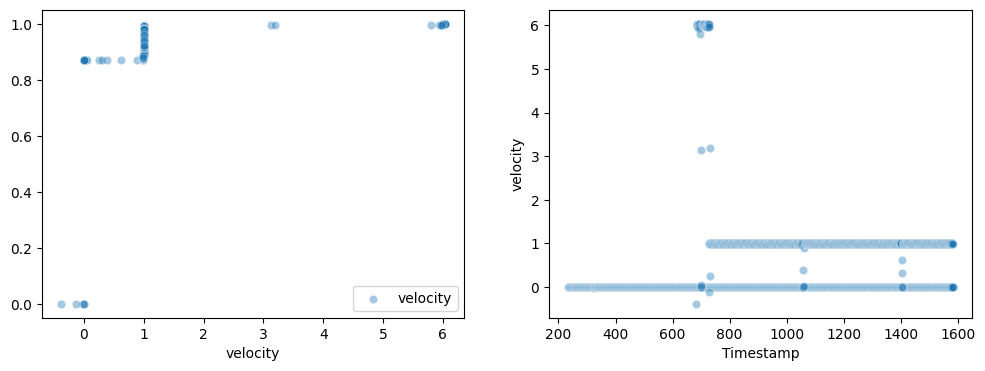

In [54]:
col = 'velocity'
ecdf = sm.distributions.ECDF(df[col])

# Plot the CDF
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
#axes[0].plot(ecdf.x, ecdf.y)
sns.scatterplot(x=df[col], y=ecdf(df[col]), alpha=0.4, ax=axes[0], label=col)
sns.scatterplot(x=df['Timestamp'], y=df[col], alpha=0.4, ax=axes[1])

I find both plots hard to interpret.

#### A plot of location over time

The text suggests to create such a plot for each species. This sort of plot is also known as a kymograph.

Text(0.5, 0.5, 'Y')

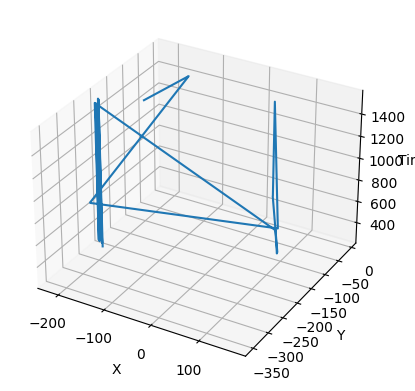

In [53]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(df['Location_X'], df['Location_Y'], df['Timestamp'], )
ax.set_zlabel('Time')
ax.set_xlabel('X')
ax.set_ylabel('Y')